# T-90 - Hardness Ratio

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# add grbttools to path
import sys
sys.path.append("../")

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from grbtools import env, disp, gmm, data, outliers, stats, models
import warnings
from grbtools import utils
warnings.filterwarnings("ignore")

## BATSE

Load BATSE dataset

In [20]:
# load batse dataset
path_batse = os.path.join(env.DIR_DATASETS, "batse.xlsx")
df_batse = pd.read_excel(path_batse, index_col=0)

# select only relevant columns
df_batse = df_batse[['name', 'ee', 'lgT90', 'lgHrd']]
# drop rows with nan values
df_batse = df_batse.dropna()
# drop inf values
df_batse = df_batse.replace([np.inf, -np.inf], np.nan).dropna()


# extract data
data_batse = df_batse[['lgT90', 'lgHrd']].values

# show some rows
df_batse.sample(5)

,name,ee,lgT90,lgHrd
trigger_num,,,,
2913,4B 940406,False,1.360063,0.589783
3491,4B 950403-,False,1.144636,0.427601
8077,GRB 000417,False,0.221153,0.853388
2126,4B 930110-,False,-0.396856,1.026622
2163,4B 930204-,False,-0.407823,1.127458


Display BATSE dataset

<Axes: title={'center': 'BATSE'}, xlabel='lgT90', ylabel='lgHrd'>

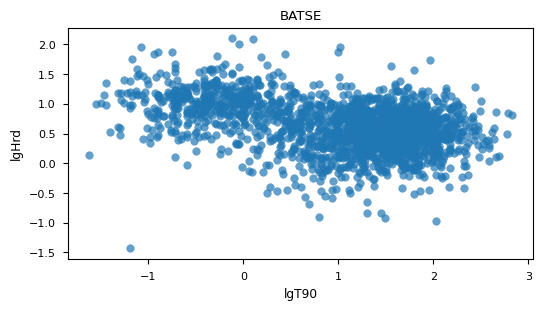

In [21]:
disp.scatter2D(df_batse, 'lgT90', 'lgHrd', title="BATSE", figsize=(6, 3))

### Detect Outliers 

#### 1. T90

In [29]:
# load batse dataset
path_batse = os.path.join(env.DIR_DATASETS, "batse.xlsx")
df_batse = pd.read_excel(path_batse, index_col=0)

# select only relevant columns
df_batse = df_batse[['name', 'ee', 'lgT90', 'lgHrd']]

# get t90 feature
df_t90 = df_batse[['lgT90']]

# drop rows with nan values
df_t90 = df_t90.dropna()
# drop inf values
df_t90 = df_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_t90 = df_t90.values.reshape(-1, 1)

# show some rows
df_t90.sample(5)

,lgT90
trigger_num,
5540,1.885180
4569,0.783904
5513,1.230244
6343,-0.213249
3926,0.997910


In [35]:
df_t90['is_outlier'], df_t90['log_dens'] = outliers.outliersKernelDensity1D(X_t90)

n_outliers = df_t90['is_outlier'].sum()
n_inliers = len(X_t90) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  12
Number of inliers:  2025


Text(0.5, 1.0, 'BATSE T90 Outliers')

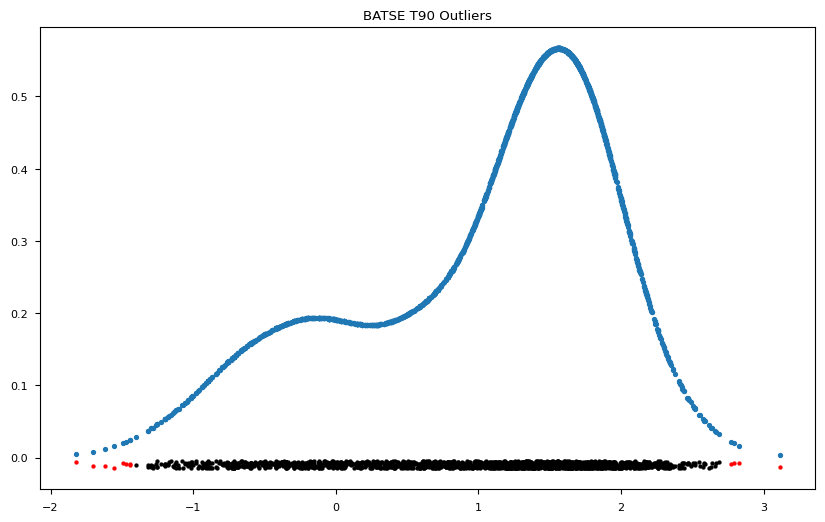

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_t90[:, 0], 
    np.exp(df_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_t90[~df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_t90[df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("BATSE T90 Outliers")

#### 2. Spectral Hardness

In [37]:
# get t90 feature
df_hrd = df_batse[['lgHrd']]

# drop rows with nan values
df_hrd = df_hrd.dropna()
# drop inf values
df_hrd = df_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_hrd = df_hrd.values.reshape(-1, 1)

In [38]:
df_hrd['is_outlier'], df_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_hrd)

n_outliers = df_hrd['is_outlier'].sum()
n_inliers = len(X_hrd) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  15
Number of inliers:  2080


Text(0.5, 1.0, 'BATSE HARDNESS Outliers')

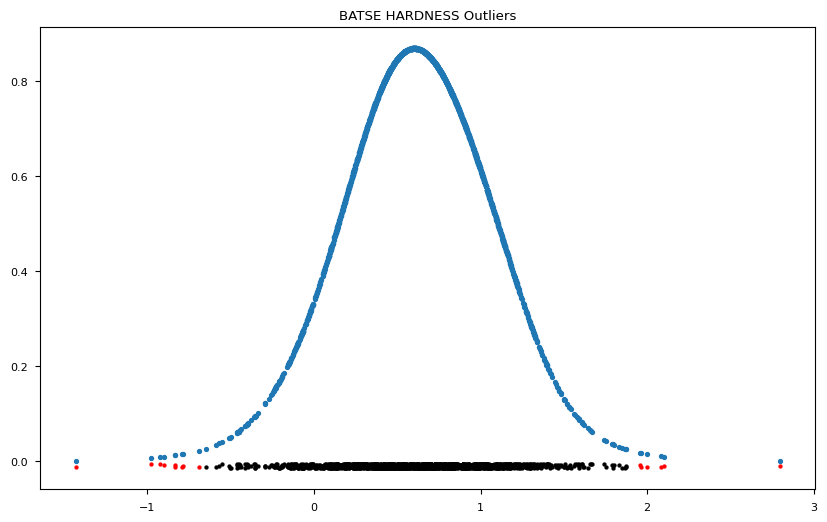

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_hrd[:, 0], 
    np.exp(df_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_hrd[~df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_hrd[df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("BATSE HARDNESS Outliers")

#### 3. T90-Hardness

In [41]:
# merge dataframes
# df_batse_merged = pd.merge(df_t90, df_hrd, on='GRB', how='outer')
df_batse_merged = df_t90.merge(df_hrd, left_index=True, right_index=True)

# drop nan values inplace
df_batse_merged.dropna(inplace=True)

df_batse_merged['is_outlier'] = df_batse_merged.apply(lambda row: row['is_outlier_x'] or row['is_outlier_y'], axis=1)
df_batse_merged

,lgT90,is_outlier_x,log_dens_x,lgHrd,is_outlier_y,log_dens_y,is_outlier
trigger_num,,,,,,,
7980,-0.619789,False,-1.867916,1.111164,False,-0.711724,False
6405,1.479201,False,-0.582079,0.448605,False,-0.201679,False
3875,0.923451,False,-1.207618,-0.040692,False,-1.212699,False
6497,0.522183,False,-1.608092,1.056147,False,-0.594058,False
1579,1.866122,False,-0.783808,1.144614,False,-0.791201,False
...,...,...,...,...,...,...,...
2240,1.625395,False,-0.577094,0.384983,False,-0.264615,False
3282,-1.107905,False,-2.704027,1.145343,False,-0.793004,False
3437,-0.463442,False,-1.748200,1.533466,False,-2.175807,False


In [42]:
df_batse_merged['is_outlier'].value_counts()

is_outlier
False    1916
True       21
Name: count, dtype: int64

Text(0.5, 1.0, 'BATSE T90-HRD Outliers')

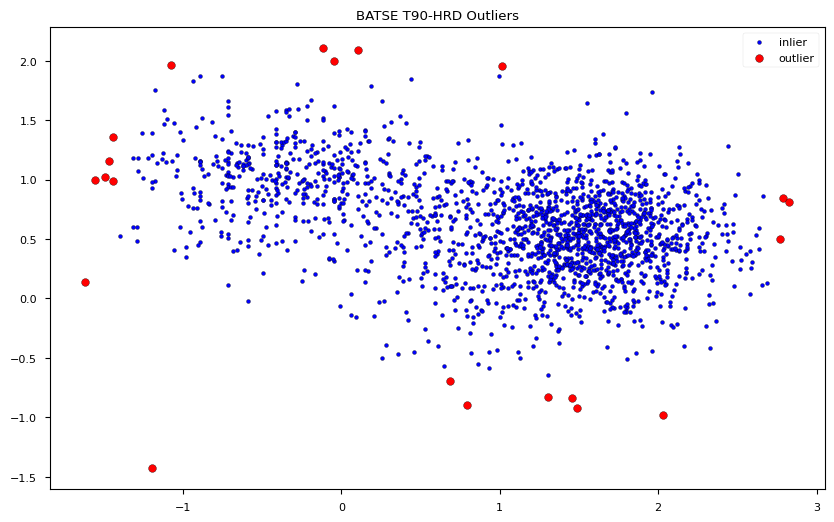

In [120]:
plt.figure(figsize=(10, 6))
df_batse_outlier = df_batse_merged[df_batse_merged['is_outlier'] == True]
df_batse_inlier = df_batse_merged[df_batse_merged['is_outlier'] == False]

plt.scatter(df_batse_inlier.loc[:, 'lgT90'], df_batse_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_batse_outlier.loc[:, 'lgT90'], df_batse_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.title("BATSE T90-HRD Outliers")

### Apply clustering model

In [123]:
gmm.createGMMs('batse', df_batse_inlier[['lgT90', 'lgHrd']], 'full')

Overwriting on the existing model...
Model with 1 components has been saved.
Overwriting on the existing model...
Model with 2 components has been saved.
Overwriting on the existing model...
Model with 3 components has been saved.
Overwriting on the existing model...
Model with 4 components has been saved.
Overwriting on the existing model...
Model with 5 components has been saved.


### Show some figures

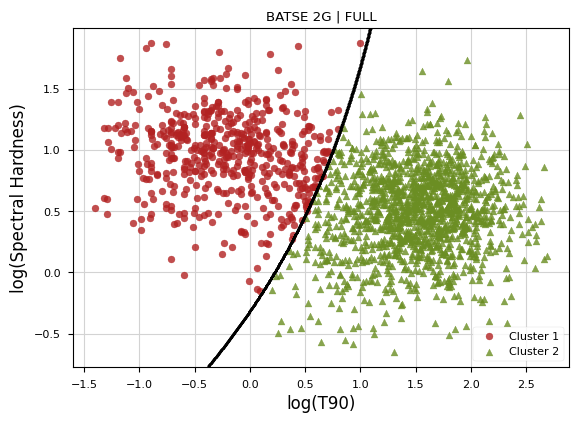

In [124]:
disp.scatter2DWithClusters("batse_lgT90_lgHrd_N2_Cfull.model", df_batse_inlier[['lgT90', 'lgHrd']],
                            title = "BATSE 2G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

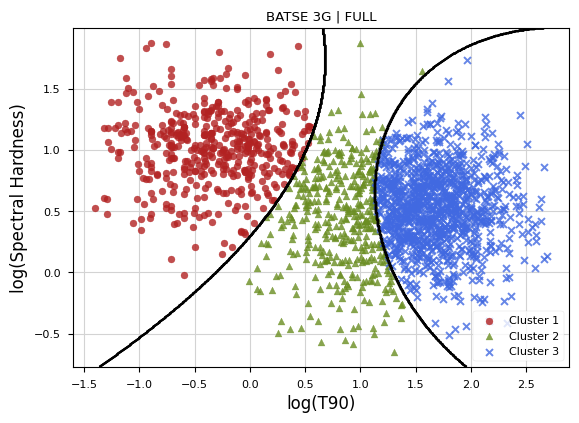

In [125]:
disp.scatter2DWithClusters("batse_lgT90_lgHrd_N3_Cfull.model", df_batse_inlier[['lgT90', 'lgHrd']],
                            title = "BATSE 3G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

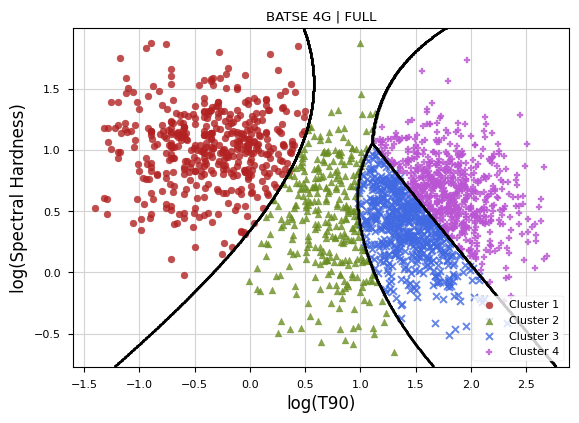

In [126]:
disp.scatter2DWithClusters("batse_lgT90_lgHrd_N4_Cfull.model", df_batse_inlier[['lgT90', 'lgHrd']],
                            title = "BATSE 4G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

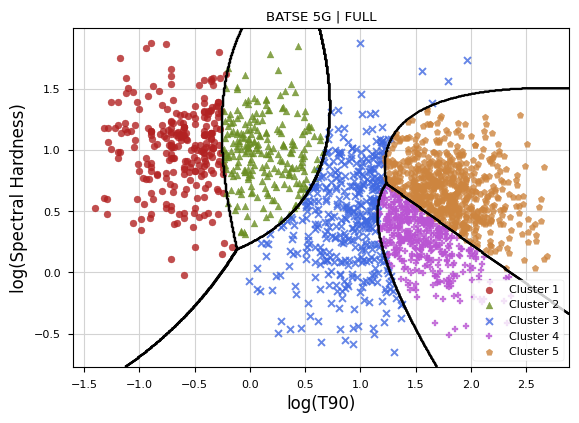

In [127]:
disp.scatter2DWithClusters("batse_lgT90_lgHrd_N5_Cfull.model", df_batse_inlier[['lgT90', 'lgHrd']],
                            title = "BATSE 5G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

### Create and save figures from all models

In [53]:
#utils.create_2D_gmm_figures(df_inlier[['lgT90', 'lgHrd']], "batse", "lgT90", "lgHrd")

#### Metrics

In [136]:
df_batse_metrics = pd.DataFrame(columns=['metric', '1G', '2G', '3G', '4G', '5G'])
df_batse_metrics['metric'] = ['Sil Score Euc', 'Sil Score Mah', 'Gap Statistic', 'Dev Bouldin', 'Cal Harabasz', 'Hopkins Statistic', 'AIC', 'BIC']

data = df_batse_inlier[['lgT90', 'lgHrd']].values

for i in range(1,6):
    metrics = []
    model = models.loadModelbyName(env.DIR_MODELS + "/batse_lgT90_lgHrd_N" + str(i) + "_Cfull.model")
    labels = model.predict(df_batse_inlier[['lgT90', 'lgHrd']])
    metrics.append(stats.silhouette_score(data, labels, 'Euclidean')['mean'])
    metrics.append(stats.silhouette_score(data, labels, 'Mahalanobis')['mean'])
    metrics.append(stats.gap_statistics(data, labels)['gap'])
    metrics.append(stats.davies_bouldin_score(data, labels))
    metrics.append(stats.calinski_harabasz_score(data, labels))
    metrics.append(stats.hopkins_statistic(data))
    metrics.append(stats.aic(model, data))
    metrics.append(stats.bic(model, data))
    
    df_batse_metrics[str(i)+"G"] = metrics
    
df_batse_metrics

,metric,1G,2G,3G,4G,5G
0,Sil Score Euc,NaN,0.587151,0.415329,0.322107,0.276575
1,Sil Score Mah,NaN,0.658180,0.572370,0.548139,0.496808
2,Gap Statistic,0.688848,0.977221,1.034884,0.880555,0.750299
3,Dev Bouldin,NaN,0.582305,0.898416,1.096881,1.097757
4,Cal Harabasz,NaN,3653.644049,2988.362587,2465.562322,2216.353251
5,Hopkins Statistic,0.891503,0.911556,0.908743,0.901748,0.907419
6,AIC,6610.454239,5935.712278,5883.152909,5886.657082,5890.663401
7,BIC,6638.244214,5996.850223,5977.638823,6014.490966,6051.845255


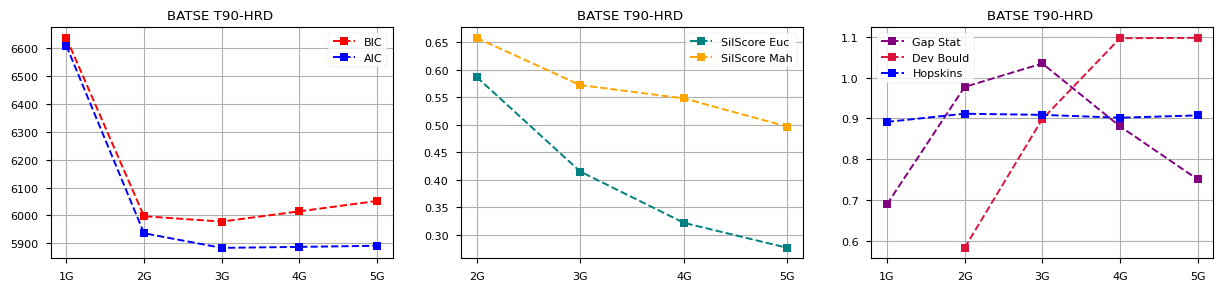

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

ax1.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[7][1:], linestyle = 'dashed', c="r", marker="s", label = "BIC")
ax1.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[6][1:], linestyle = 'dashed', c="b", marker="s", label = "AIC")
ax1.grid()
ax1.set_title("BATSE T90-HRD ")
ax1.legend()

ax2.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[0][1:], linestyle = 'dashed', c="teal", marker="s", label = "SilScore Euc")
ax2.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[1][1:], linestyle = 'dashed', c="orange", marker="s", label = "SilScore Mah")
ax2.grid()
ax2.set_title("BATSE T90-HRD ")
ax2.legend()

ax3.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[2][1:], linestyle = 'dashed', c="purple", marker="s", label = "Gap Stat")
ax3.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[3][1:], linestyle = 'dashed', c="crimson", marker="s", label = "Dev Bould")
ax3.plot(df_batse_metrics.columns[1:], df_batse_metrics.iloc[5][1:], linestyle = 'dashed', c="blue", marker="s", label = "Hopskins")
ax3.grid()
ax3.set_title("BATSE T90-HRD ")
ax3.legend()



--------

## FERMI

Load FERMI dataset

In [107]:
# load fermi dataset
path_fermi = os.path.join(env.DIR_DATASETS, "fermi.xlsx")
df_fermi = pd.read_excel(path_fermi, index_col=0)

# select only relevant columns
df_fermi = df_fermi[['name', 'ee', 'lgT90', 'lgHrd']]

# drop rows with nan values
df_fermi = df_fermi.dropna()

# drop inf values
df_fermi = df_fermi.replace([np.inf, -np.inf], np.nan).dropna()

# extract data
data_fermi = df_fermi[['lgT90', 'lgHrd']].values

# show some rows
df_fermi.sample(5)

,name,ee,lgT90,lgHrd
2041,GRB160827616,False,0.806180,0.559044
236,GRB150204272,False,1.041708,0.493186
2482,GRB160929529,False,0.663512,0.839973
2241,GRB170722525,False,1.572593,0.663513
2759,GRB100929315,False,0.663512,0.565427


Display FERMI dataset

<Axes: title={'center': 'FERMI'}, xlabel='lgT90', ylabel='lgHrd'>

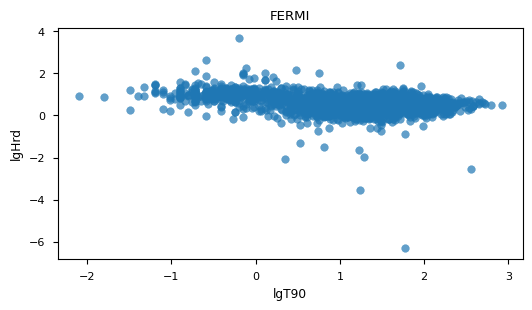

In [108]:
disp.scatter2D(df_fermi, 'lgT90', 'lgHrd', title="FERMI", figsize=(6, 3))

###  Detect Outliers

#### 1. T90

In [109]:
# load fermi dataset
path_fermi = os.path.join(env.DIR_DATASETS, "fermi.xlsx")
df_fermi = pd.read_excel(path_fermi, index_col=0)

# select only relevant columns
df_fermi = df_fermi[['name', 'ee', 'lgT90', 'lgHrd']]

# get t90 feature
df_t90 = df_fermi[['lgT90']]

# drop rows with nan values
df_t90 = df_t90.dropna()
# drop inf values
df_t90 = df_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_t90 = df_t90.values.reshape(-1, 1)

# show some rows
df_t90.sample(5)

,lgT90
3465,1.665919
2741,1.897852
1771,0.061452
2854,-0.114639
1194,1.907927


In [110]:
df_t90['is_outlier'], df_t90['log_dens'] = outliers.outliersKernelDensity1D(X_t90)

n_outliers = df_t90['is_outlier'].sum()
n_inliers = len(X_t90) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  32
Number of inliers:  3536


Text(0.5, 1.0, 'FERMI T90 Outliers')

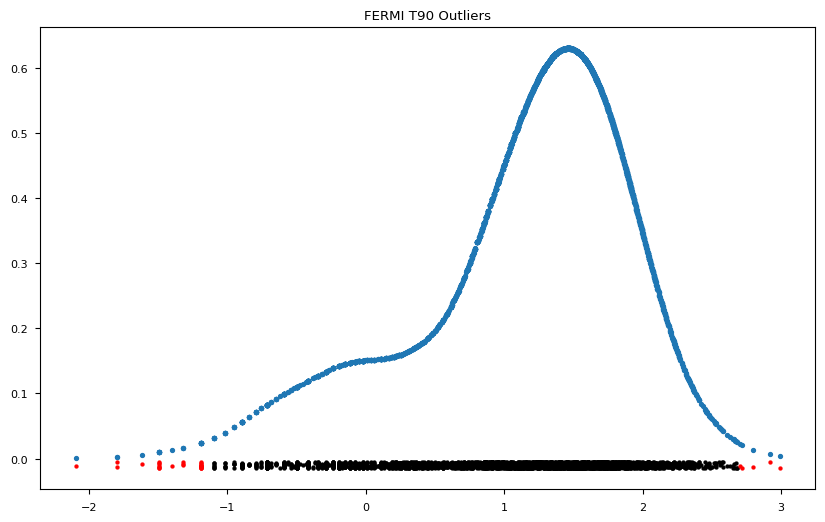

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_t90[:, 0], 
    np.exp(df_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_t90[~df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_t90[df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("FERMI T90 Outliers")

#### 2. Spectral Hardness

In [112]:
# get t90 feature
df_hrd = df_fermi[['lgHrd']]

# drop rows with nan values
df_hrd = df_hrd.dropna()
# drop inf values
df_hrd = df_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_hrd = df_hrd.values.reshape(-1, 1)

In [113]:
df_hrd['is_outlier'], df_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_hrd)

n_outliers = df_hrd['is_outlier'].sum()
n_inliers = len(X_hrd) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  30
Number of inliers:  2281


Text(0.5, 1.0, 'FERMI HARDNESS Outliers')

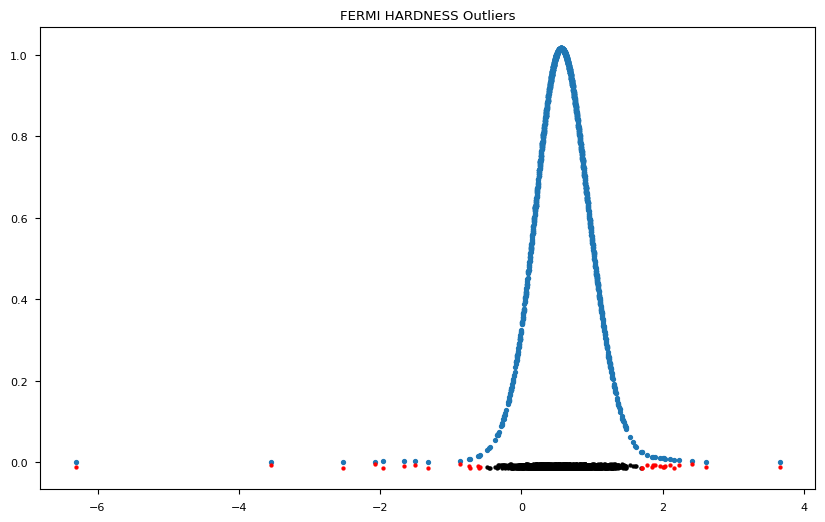

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_hrd[:, 0], 
    np.exp(df_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_hrd[~df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_hrd[df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("FERMI HARDNESS Outliers")

#### 3. T90 - Spectral Hardness

In [115]:
# merge dataframes
df_fermi_merged = df_t90.merge(df_hrd, left_index=True, right_index=True)

# drop nan values inplace
df_fermi_merged.dropna(inplace=True)

df_fermi_merged['is_outlier'] = df_fermi_merged.apply(lambda row: row['is_outlier_x'] or row['is_outlier_y'], axis=1)
df_fermi_merged

,lgT90,is_outlier_x,log_dens_x,lgHrd,is_outlier_y,log_dens_y,is_outlier
0,0.632255,False,-1.422048,0.531720,False,0.012290,False
1,1.240749,False,-0.543656,0.486977,False,-0.005522,False
5,1.115810,False,-0.655242,0.878002,False,-0.320217,False
6,1.080338,False,-0.694442,0.124865,False,-0.679809,False
7,0.964542,False,-0.844191,0.433213,False,-0.046714,False
...,...,...,...,...,...,...,...
3563,1.720002,False,-0.591518,0.666013,False,-0.022709,False
3565,-0.152427,False,-1.928106,1.130122,False,-0.982701,False
3566,1.744708,False,-0.618385,0.353489,False,-0.147072,False
3567,0.878062,False,-0.977816,0.310897,False,-0.219450,False


In [117]:
df_fermi_merged['is_outlier'].value_counts()

is_outlier
False    2263
True       47
Name: count, dtype: int64

Text(0.5, 1.0, 'FERMI T90-HRD Outliers')

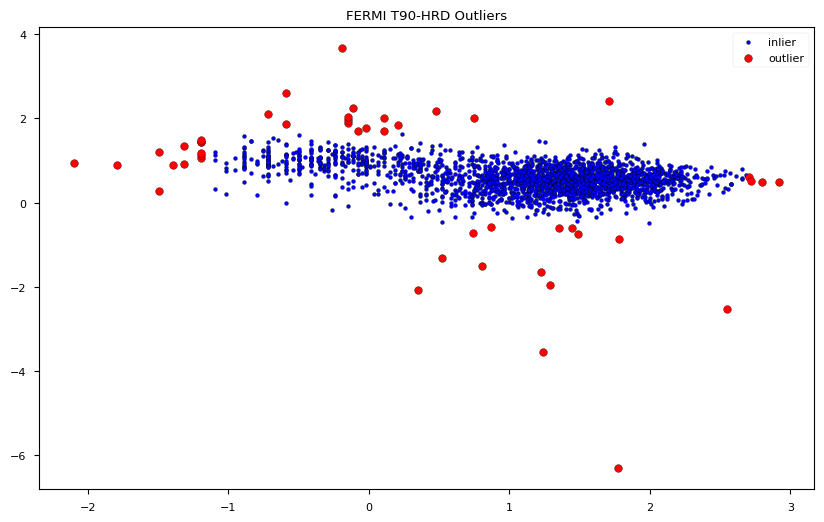

In [130]:
plt.figure(figsize=(10, 6))
df_fermi_outlier = df_fermi_merged[df_fermi_merged['is_outlier'] == True]
df_fermi_inlier = df_fermi_merged[df_fermi_merged['is_outlier'] == False]

plt.scatter(df_fermi_inlier.loc[:, 'lgT90'], df_fermi_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_fermi_outlier.loc[:, 'lgT90'], df_fermi_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.title("FERMI T90-HRD Outliers")

### Apply clustering model

In [131]:
gmm.createGMMs('fermi', df_fermi_inlier[['lgT90', 'lgHrd']], 'full')

Overwriting on the existing model...
Model with 1 components has been saved.
Overwriting on the existing model...
Model with 2 components has been saved.
Overwriting on the existing model...
Model with 3 components has been saved.
Overwriting on the existing model...
Model with 4 components has been saved.
Overwriting on the existing model...
Model with 5 components has been saved.


### Show some figures

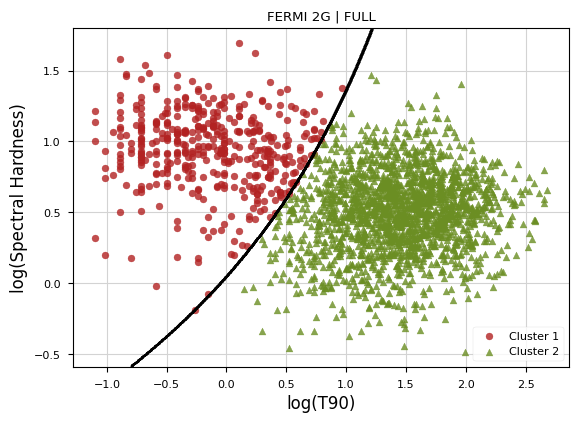

In [132]:
disp.scatter2DWithClusters("fermi_lgT90_lgHrd_N2_Cfull.model", df_fermi_inlier[['lgT90', 'lgHrd']],
                            title = "FERMI 2G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

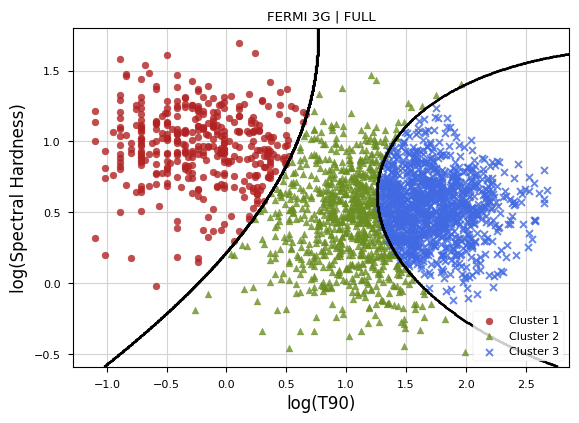

In [133]:
disp.scatter2DWithClusters("fermi_lgT90_lgHrd_N3_Cfull.model", df_fermi_inlier[['lgT90', 'lgHrd']],
                            title = "FERMI 3G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

### Create and save all figures

In [ ]:
#utils.create_2D_gmm_figures(df_fermi[['lgT90', 'lgHrd']], "fermi", "lgT90", "lgHrd")

#### Metrics

In [135]:
df_fermi_metrics = pd.DataFrame(columns=['metric', '1G', '2G', '3G', '4G', '5G'])
df_fermi_metrics['metric'] = ['Sil Score Euc', 'Sil Score Mah', 'Gap Statistic', 'Dev Bouldin', 'Cal Harabasz', 'Hopkins Statistic', 'AIC', 'BIC']

data = df_fermi_inlier[['lgT90', 'lgHrd']].values

for i in range(1,6):
    metrics = []
    model = models.loadModelbyName(env.DIR_MODELS + "/fermi_lgT90_lgHrd_N" + str(i) + "_Cfull.model")
    labels = model.predict(df_fermi_inlier[['lgT90', 'lgHrd']])
    metrics.append(stats.silhouette_score(data, labels, 'Euclidean')['mean'])
    metrics.append(stats.silhouette_score(data, labels, 'Mahalanobis')['mean'])
    metrics.append(stats.gap_statistics(data, labels)['gap'])
    metrics.append(stats.davies_bouldin_score(data, labels))
    metrics.append(stats.calinski_harabasz_score(data, labels))
    metrics.append(stats.hopkins_statistic(data))
    metrics.append(stats.aic(model, data))
    metrics.append(stats.bic(model, data))
    
    df_fermi_metrics[str(i)+"G"] = metrics
    
df_fermi_metrics

,metric,1G,2G,3G,4G,5G
0,Sil Score Euc,NaN,0.587269,0.402726,0.369994,0.345884
1,Sil Score Mah,NaN,0.657170,0.519003,0.518899,0.489100
2,Gap Statistic,0.829857,0.925598,1.088089,0.949242,0.926548
3,Dev Bouldin,NaN,0.575722,0.869793,0.911682,0.914405
4,Cal Harabasz,NaN,3378.199076,3273.339003,2676.935352,2764.112369
5,Hopkins Statistic,0.922344,0.907560,0.896045,0.908682,0.923475
6,AIC,6243.514329,5466.970243,5419.101485,5421.082274,5414.867693
7,BIC,6272.136562,5529.939156,5516.417078,5552.744547,5580.876646


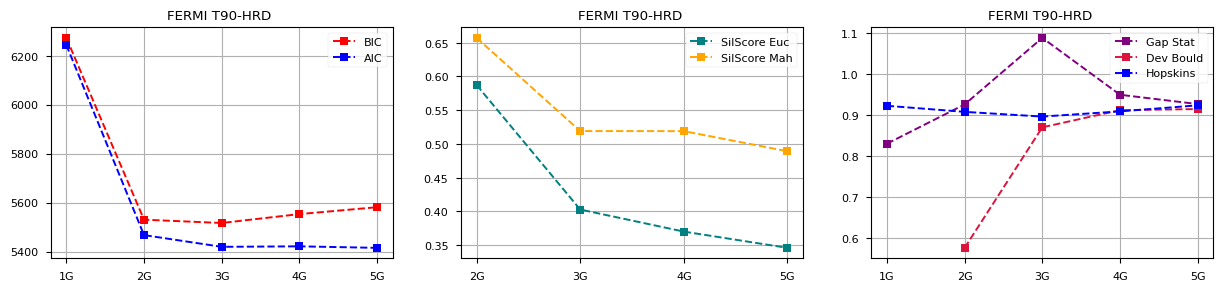

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

ax1.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[7][1:], linestyle = 'dashed', c="r", marker="s", label = "BIC")
ax1.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[6][1:], linestyle = 'dashed', c="b", marker="s", label = "AIC")
ax1.grid()
ax1.set_title("FERMI T90-HRD ")
ax1.legend()

ax2.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[0][1:], linestyle = 'dashed', c="teal", marker="s", label = "SilScore Euc")
ax2.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[1][1:], linestyle = 'dashed', c="orange", marker="s", label = "SilScore Mah")
ax2.grid()
ax2.set_title("FERMI T90-HRD ")
ax2.legend()

ax3.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[2][1:], linestyle = 'dashed', c="purple", marker="s", label = "Gap Stat")
ax3.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[3][1:], linestyle = 'dashed', c="crimson", marker="s", label = "Dev Bould")
ax3.plot(df_fermi_metrics.columns[1:], df_fermi_metrics.iloc[5][1:], linestyle = 'dashed', c="blue", marker="s", label = "Hopskins")
ax3.grid()
ax3.set_title("FERMI T90-HRD ")
ax3.legend()


------

## SWIFT

Load SWIFT dataset

In [139]:
# load swift dataset
path_swift = os.path.join(env.DIR_DATASETS, "swift.xlsx")
df_swift = pd.read_excel(path_swift, index_col=0)

# select only relevant columns
df_swift = df_swift[['name', 'ee', 'lgT90', 'lgHrd']]

# drop rows with nan values
df_swift = df_swift.dropna()

# drop inf values
df_swift = df_swift.replace([np.inf, -np.inf], np.nan).dropna()

# extract data
data_swift = df_swift[['lgT90', 'lgHrd']].values

# show some rows
df_swift.sample(5)

,name,ee,lgT90,lgHrd
388,GRB170419A,False,0.890756,-0.25380
8,GRB220611A,False,1.755875,-0.16413
402,GRB170205A,False,1.417106,-0.15313
1460,GRB050824,False,1.398079,-0.66436
1198,GRB080604,False,1.889907,-0.05992


Display SWIFT dataset

<Axes: title={'center': 'SWIFT'}, xlabel='lgT90', ylabel='lgHrd'>

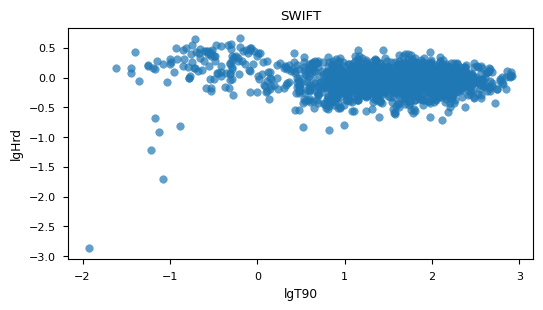

In [26]:
disp.scatter2D(df_swift, 'lgT90', 'lgHrd', title="SWIFT", figsize=(6, 3))

### Detect Outliers

#### 1. T90

In [140]:
# load batse dataset
path_swift = os.path.join(env.DIR_DATASETS, "swift.xlsx")
df_swift = pd.read_excel(path_swift, index_col=0)

# select only relevant columns
df_swift = df_swift[['name', 'ee', 'lgT90', 'lgHrd']]

# get t90 feature
df_t90 = df_swift[['lgT90']]

# drop rows with nan values
df_t90 = df_t90.dropna()
# drop inf values
df_t90 = df_t90.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_t90 = df_t90.values.reshape(-1, 1)

# show some rows
df_t90.sample(5)

,lgT90
316,2.329471
843,2.215754
164,1.481844
1296,0.893651
647,0.910838


In [141]:
df_t90['is_outlier'], df_t90['log_dens'] = outliers.outliersKernelDensity1D(X_t90)

n_outliers = df_t90['is_outlier'].sum()
n_inliers = len(X_t90) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  9
Number of inliers:  1494


Text(0.5, 1.0, 'SWIFT T90 Outliers')

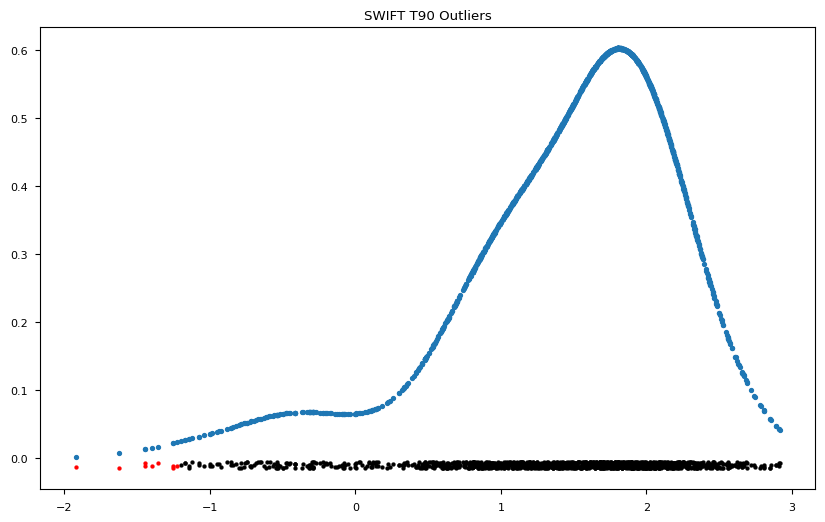

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_t90[:, 0], 
    np.exp(df_t90['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_t90[~df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_t90[df_t90['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("SWIFT T90 Outliers")

#### 2. Spectral Hardness

In [144]:
# get t90 feature
df_hrd = df_swift[['lgHrd']]

# drop rows with nan values
df_hrd = df_hrd.dropna()
# drop inf values
df_hrd = df_hrd.replace([np.inf, -np.inf], np.nan).dropna()

# extract values
X_hrd = df_hrd.values.reshape(-1, 1)

In [145]:
df_hrd['is_outlier'], df_hrd['log_dens'] = outliers.outliersKernelDensity1D(X_hrd)

n_outliers = df_hrd['is_outlier'].sum()
n_inliers = len(X_hrd) - n_outliers

print("Number of outliers: ", n_outliers)
print("Number of inliers: ", n_inliers)

Number of outliers:  3
Number of inliers:  1487


Text(0.5, 1.0, 'BATSE HARDNESS Outliers')

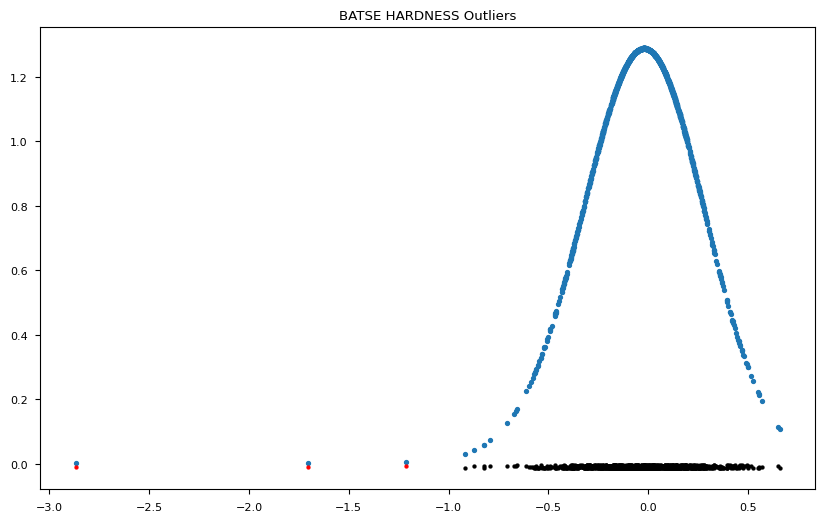

In [146]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_hrd[:, 0], 
    np.exp(df_hrd['log_dens']), 
    lw=1,
    marker=".")
plt.scatter(X_hrd[~df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_inliers), marker=".", color="black")
plt.scatter(X_hrd[df_hrd['is_outlier'], 0], -0.005 - 0.01 * np.random.random(n_outliers), marker=".", color="red")
plt.title("BATSE HARDNESS Outliers")

#### 3. T90-Hardness

In [147]:
# merge dataframes
df_swift_merged = df_t90.merge(df_hrd, left_index=True, right_index=True)

# drop nan values inplace
df_swift_merged.dropna(inplace=True)

df_swift_merged['is_outlier'] = df_swift_merged.apply(lambda row: row['is_outlier_x'] or row['is_outlier_y'], axis=1)
df_swift_merged

,lgT90,is_outlier_x,log_dens_x,lgHrd,is_outlier_y,log_dens_y,is_outlier
0,1.606467,False,-0.577986,0.11141,False,0.157921,False
1,1.690550,False,-0.533851,-0.18394,False,0.112368,False
2,1.939799,False,-0.541033,-0.09166,False,0.226982,False
3,0.602060,False,-1.654540,-0.35509,False,-0.330274,False
4,1.934478,False,-0.538280,-0.10224,False,0.218395,False
...,...,...,...,...,...,...,...
1519,2.037665,False,-0.613635,0.22036,False,-0.064581,False
1520,0.746945,False,-1.386715,-0.05637,False,0.246994,False
1521,1.000000,False,-1.059342,-0.23642,False,0.007772,False
1522,0.993701,False,-1.065678,-0.24785,False,-0.018723,False


In [149]:
df_swift_merged['is_outlier'].value_counts()

is_outlier
False    1467
True       10
Name: count, dtype: int64

Text(0.5, 1.0, 'SWIFT T90-HRD Outliers')

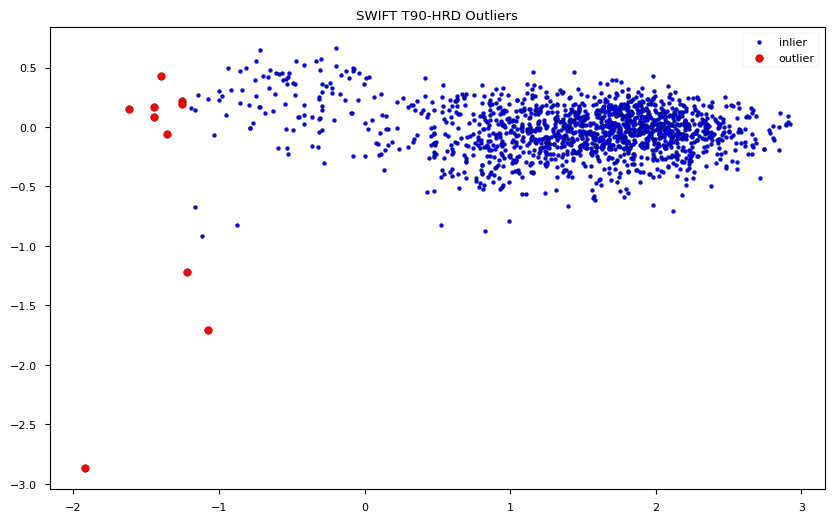

In [150]:
plt.figure(figsize=(10, 6))
df_swift_outlier = df_swift_merged[df_swift_merged['is_outlier'] == True]
df_swift_inlier = df_swift_merged[df_swift_merged['is_outlier'] == False]

plt.scatter(df_swift_inlier.loc[:, 'lgT90'], df_swift_inlier.loc[:, 'lgHrd'], color="blue", marker=".", edgecolors="black", label="inlier")
plt.scatter(df_swift_outlier.loc[:, 'lgT90'], df_swift_outlier.loc[:, 'lgHrd'], color="red", marker="o", edgecolors="black", label="outlier") 
plt.legend()
plt.title("SWIFT T90-HRD Outliers")

### Apply clustering model

In [151]:
gmm.createGMMs('swift', df_swift_inlier[['lgT90', 'lgHrd']], 'full')

Overwriting on the existing model...
Model with 1 components has been saved.
Overwriting on the existing model...
Model with 2 components has been saved.
Overwriting on the existing model...
Model with 3 components has been saved.
Overwriting on the existing model...
Model with 4 components has been saved.
Overwriting on the existing model...
Model with 5 components has been saved.


### Show some figures

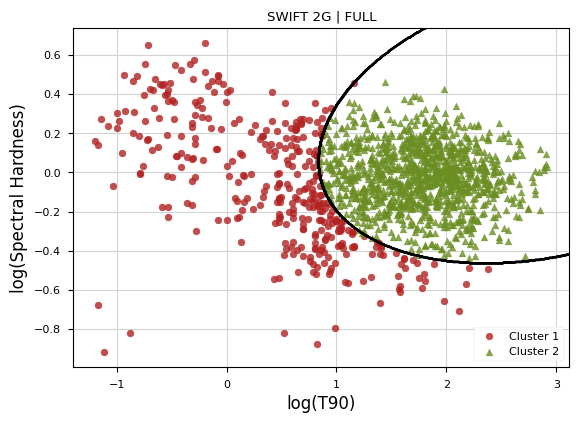

In [152]:
disp.scatter2DWithClusters("swift_lgT90_lgHrd_N2_Cfull.model", df_swift_inlier[['lgT90', 'lgHrd']],
                            title = "SWIFT 2G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

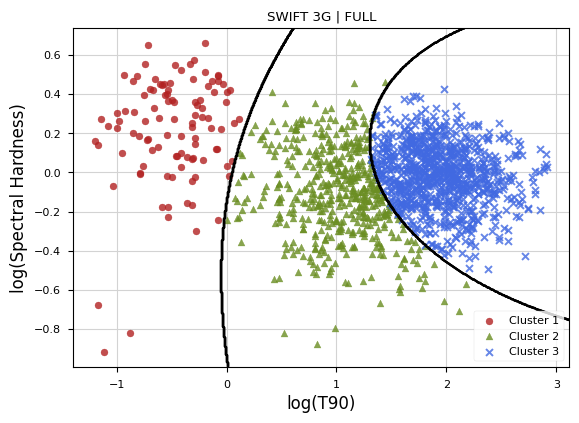

In [153]:
disp.scatter2DWithClusters("swift_lgT90_lgHrd_N3_Cfull.model", df_swift_inlier[['lgT90', 'lgHrd']],
                            title = "SWIFT 3G", xlabel = "log(T90)", ylabel = "log(Spectral Hardness)")

### Create and save all figures

In [ ]:
#utils.create_2D_gmm_figures(df_swift[['lgT90', 'lgHrd']], "swift", "lgT90", "lgHrd")

### Metrics

In [154]:
df_swift_metrics = pd.DataFrame(columns=['metric', '1G', '2G', '3G', '4G', '5G'])
df_swift_metrics['metric'] = ['Sil Score Euc', 'Sil Score Mah', 'Gap Statistic', 'Dev Bouldin', 'Cal Harabasz', 'Hopkins Statistic', 'AIC', 'BIC']

data = df_swift_inlier[['lgT90', 'lgHrd']].values

for i in range(1,6):
    metrics = []
    model = models.loadModelbyName(env.DIR_MODELS + "/swift_lgT90_lgHrd_N" + str(i) + "_Cfull.model")
    labels = model.predict(df_swift_inlier[['lgT90', 'lgHrd']])
    metrics.append(stats.silhouette_score(data, labels, 'Euclidean')['mean'])
    metrics.append(stats.silhouette_score(data, labels, 'Mahalanobis')['mean'])
    metrics.append(stats.gap_statistics(data, labels)['gap'])
    metrics.append(stats.davies_bouldin_score(data, labels))
    metrics.append(stats.calinski_harabasz_score(data, labels))
    metrics.append(stats.hopkins_statistic(data))
    metrics.append(stats.aic(model, data))
    metrics.append(stats.bic(model, data))
    
    df_swift_metrics[str(i)+"G"] = metrics
    
df_swift_metrics

,metric,1G,2G,3G,4G,5G
0,Sil Score Euc,NaN,0.504819,0.480719,0.378525,0.357025
1,Sil Score Mah,NaN,0.495199,0.551960,0.521141,0.508943
2,Gap Statistic,0.930876,0.593168,0.836801,1.015194,1.057480
3,Dev Bouldin,NaN,0.795045,0.655568,0.792516,0.822810
4,Cal Harabasz,NaN,1552.843373,2266.176362,2475.999867,2393.855348
5,Hopkins Statistic,0.927604,0.920666,0.923118,0.939768,0.934004
6,AIC,2961.328513,2514.171458,2434.026163,2445.131930,2443.703594
7,BIC,2987.783387,2572.372181,2523.972734,2566.824350,2597.141863


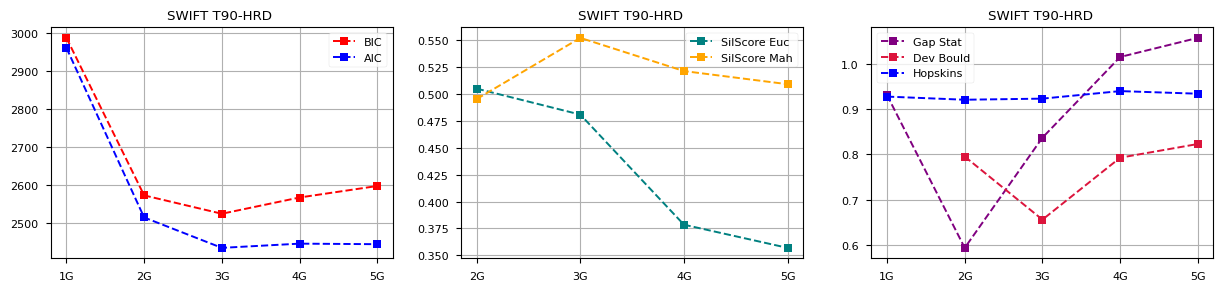

In [155]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

ax1.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[7][1:], linestyle = 'dashed', c="r", marker="s", label = "BIC")
ax1.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[6][1:], linestyle = 'dashed', c="b", marker="s", label = "AIC")
ax1.grid()
ax1.set_title("SWIFT T90-HRD ")
ax1.legend()

ax2.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[0][1:], linestyle = 'dashed', c="teal", marker="s", label = "SilScore Euc")
ax2.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[1][1:], linestyle = 'dashed', c="orange", marker="s", label = "SilScore Mah")
ax2.grid()
ax2.set_title("SWIFT T90-HRD ")
ax2.legend()

ax3.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[2][1:], linestyle = 'dashed', c="purple", marker="s", label = "Gap Stat")
ax3.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[3][1:], linestyle = 'dashed', c="crimson", marker="s", label = "Dev Bould")
ax3.plot(df_swift_metrics.columns[1:], df_swift_metrics.iloc[5][1:], linestyle = 'dashed', c="blue", marker="s", label = "Hopskins")
ax3.grid()
ax3.set_title("SWIFT T90-HRD ")
ax3.legend()
